<a href="https://colab.research.google.com/github/jmsato/CS4650_HW5/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{'source': {'id': None, 'name': 'New York Times'}, 'author': 'Jonathan Wolfe and Amelia Nierenberg', 'title': 'Coronavirus Briefing: What Happened Today', 'description': 'People with underlying conditions are begging officials to add their condition to the vaccine priority list.', 'url': 'https://www.nytimes.com/2021/03/09/us/coronavirus-briefing-what-happened-today.html', 'urlToImage': 'https://static01.nyt.com/images/2021/03/09/multimedia/09coronavirus-nl/09coronavirus-nl-facebookJumbo.png', 'publishedAt': '2021-03-09T23:04:24Z', 'content': 'But medical ethicists say the list is misleading because it suggests that the risks for all medical conditions have been evaluated and ranked. Is a 50-year-old with Type 1 diabetes at higher risk tha… [+1300 chars]'}
{'source': {'id': None, 'name': 'New York Times'}, 'author': 'Jonathan Wolfe and Amelia Nierenberg', 'title': 'Coronavirus Briefing: What Happened Today', 'description': 'The U.S. political divide is affecting its vaccine rollout.', 

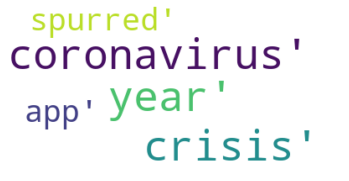

In [3]:
import spacy
import en_core_web_lg
from newsapi.newsapi_client import NewsApiClient
import pickle
import pandas as pd
from datetime import datetime
from collections import Counter
from google.colab import drive
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Function to extract part-of-speech tagging
pos_tag = {'VERB', 'NOUN', 'PROPN'}
def get_keywords_eng(text):
  result = []
  for token in nlp_eng(text):
    if (token.text in nlp_eng.Defaults.stop_words):
      continue
    if (token.pos_ in pos_tag):
      result.append(token.text)
  return result

#API request
nlp_eng = en_core_web_lg.load()
newsapi = NewsApiClient(api_key='eb18bdd4d4e645978ac8143372f2184a')
articles = list()
for pagina in range(1,6):
  temp = newsapi.get_everything(q='coronavirus', language='en', from_param='2021-02-23', to='2021-03-22', sort_by='relevancy', page=pagina)
  for item in temp['articles']:
    articles.append(item)

#Save result to Google Drive
filename = 'articlesCOVID.pckl'
pickle.dump(articles, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
filepath = 'articlesCOVID.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

#Get only title, date, description, and content of articles
dados = list()
for i, article in enumerate(articles):
  print(article)
  title = article['title']
  date = article['publishedAt']
  date = datetime.fromisoformat(date[:-1]).date()
  description = article['description']
  content = article['content']
  dados.append({'title': title, 'date': date, 'desc': description, 'content': content, 'keywords': [None] * 5})
df = pd.DataFrame(dados)

#Clean the data
df = df.dropna()

#Extract parts of speech data from content
for content in df.content.values:
  results = list()
  results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])
  df.at[df.index[df.content == content][0], 'keywords'] = results[0]

#Print example of data and save into a csv file to save onto Google Drive
df.head()
print(df)
drive.mount('drive')
df.to_csv('CovidArticles.csv')
!cp CovidArticles.csv "drive/My Drive/"

#WordCloud picture
text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()